## Glass Classification Dataset

* Source (UCI): https://archive.ics.uci.edu/ml/datasets.php
* Kaggle Link: https://www.kaggle.com/uciml/glass

#### Overview

* **Description**: Glass identification dataset from UCI datasets. It contains 9 features which are the percentage concentrations of elements within the glass, e.g. Mg, Al, and the refractive index of the glass. The label is the type of glass; there are 7 distinct types of glass labelled 1 - 7.
* **Data Preprocessing**: Requires almost no preprocessing aside from scaling, the dataset is extremely organised with no missing values to handle. The challenges are that the data is highly skewed so normal scaling may not be the most effective way of normalising the data. Additionally, the variables are highly correlated with each other.
* **Results:** Random Forest (with no hyperparameter optimisation) achieves on the order of 75% accuracy - there is scope to use other algorithms to see if a higher accuracy can be achieved. Could demonstrate a one or two example algrothims and then issue a challenge to the students to achieve a better accuracy (therefore this could be a good dataset to illustrate the machine learning pipeline).


### Import Statements and Load Data

In [2]:
# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Useful methods
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('datasets/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Exploratory Data Analysis

Following this text, all of these methods/visualisations are presented in the order listed.

#### Useful Methods

* `.info()` is a useful function as it shows a data count of all non-null values and the data type for each feature. This can be used to determine if there are any features which have inappropriate data types of if there are any major discrepancies in the number of data points - just generally a good method to call to immediately flag any obvious issues with the data. Note that `.dtypes` will provide just the data types if you're only interested in this.
* `.isna().sum()` is a good function to count how many missing or NaN values are present in each feature. `Pandas` will automatically fill blank/missing data entries with NaN. Note that it is still worth giving the dataset a manual skim because non-standard missing values won't be counted, e.g. '--' or 'n/a'. Depending on the dataset, cleaning the data could take up the bulk of your time. Sometimes you may want to  fill in the missing values, often this is done by using the median: `df['feature'].fillna(df['feature'].median(), inplace=True)`.
* `.describe()` is another handy method which provides a summary of the distribution of the data.

#### Visualisations

Depending on the dataset and your needs, you may or may not want to create some visualisation of the dataset to aid your exploratory data analysis. The following is a list of some common visualisations, you may want to use any number of these.

* **Data distribution with histogram** : `sns.displot` is my prefered method of graphing distributions, for more information please read the Seaborn [docs](https://seaborn.pydata.org/generated/seaborn.displot.html "Seaborn sns.displot documentation"). This method can also be used to plot multiple classes (will automatically filter) distributions against the dame variable, it can also plot the distribution of two features against each other.
* **Data distribution with Boxplot** : `sns.boxplot` is another good way of visualising a distribution and better at showing outliers.
* **Correlation Matrix** : `sns.heatmap`
* **Pairplot** : `sns.pairplot`


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Figure size 576x576 with 0 Axes>

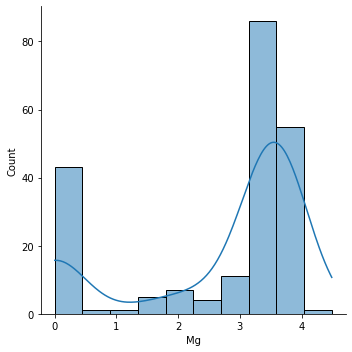

In [21]:
# Distribution of Mg feature
plt.figure(figsize=(8, 8))
sns.displot(data=df['Mg'], kde=True) # kde=True is a nice curve to show - it approximates the continuous distribution
plt.show()

<Figure size 576x576 with 0 Axes>

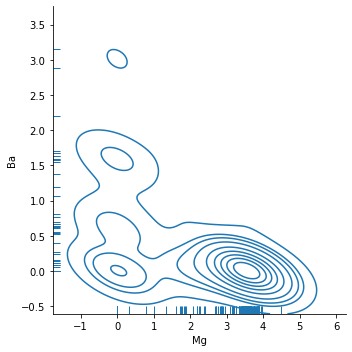

In [24]:
# Two features distributions plotted against each other.
# Can conclude that when large amounts of Mg is present, no Ba (or very little) is present.
plt.figure(figsize=(8, 8))
sns.displot(data=df, x="Mg", y="Ba", kind="kde", rug=True)
plt.show()

<Figure size 576x576 with 0 Axes>

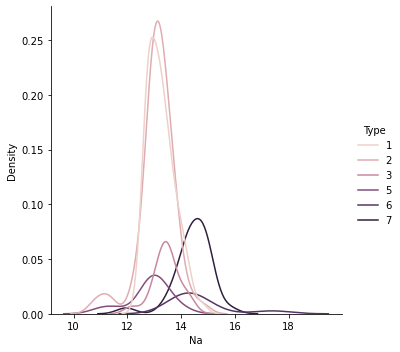

In [29]:
# Plotting the distribution of Na for each type of glass
# e.g. can see that Type 7 glass contains much more Na then Type 1 glass
plt.figure(figsize=(8, 8))
sns.displot(data=df, x="Na", hue="Type", kind="kde")
plt.show()

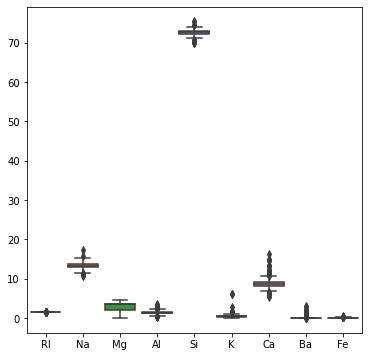

In [35]:
# Boxplot (may be better at visualising outliers)
features = df.columns[:-1].tolist()
plt.figure(figsize=(6,6))
sns.boxplot(data=df[features])
plt.show()

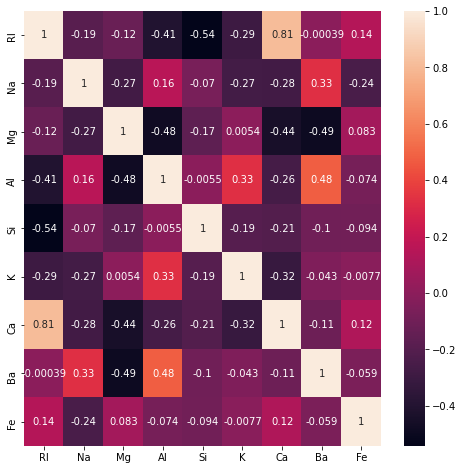

In [37]:
# Plot correlation matrix
# A value of 1 or -1 means highly correlated or highly negatively correlated
# e.g. RI and Ca have 0.81 correlation, this means that as RI increases, Ca increases (not perfectly otherwise would be 1)
plt.figure(figsize=(8,8))
corr = df.drop(['Type'],axis=1).corr() # only want variables (not full dataset inc. labels)
sns.heatmap(corr,annot=True)
plt.show()

<Figure size 504x504 with 0 Axes>

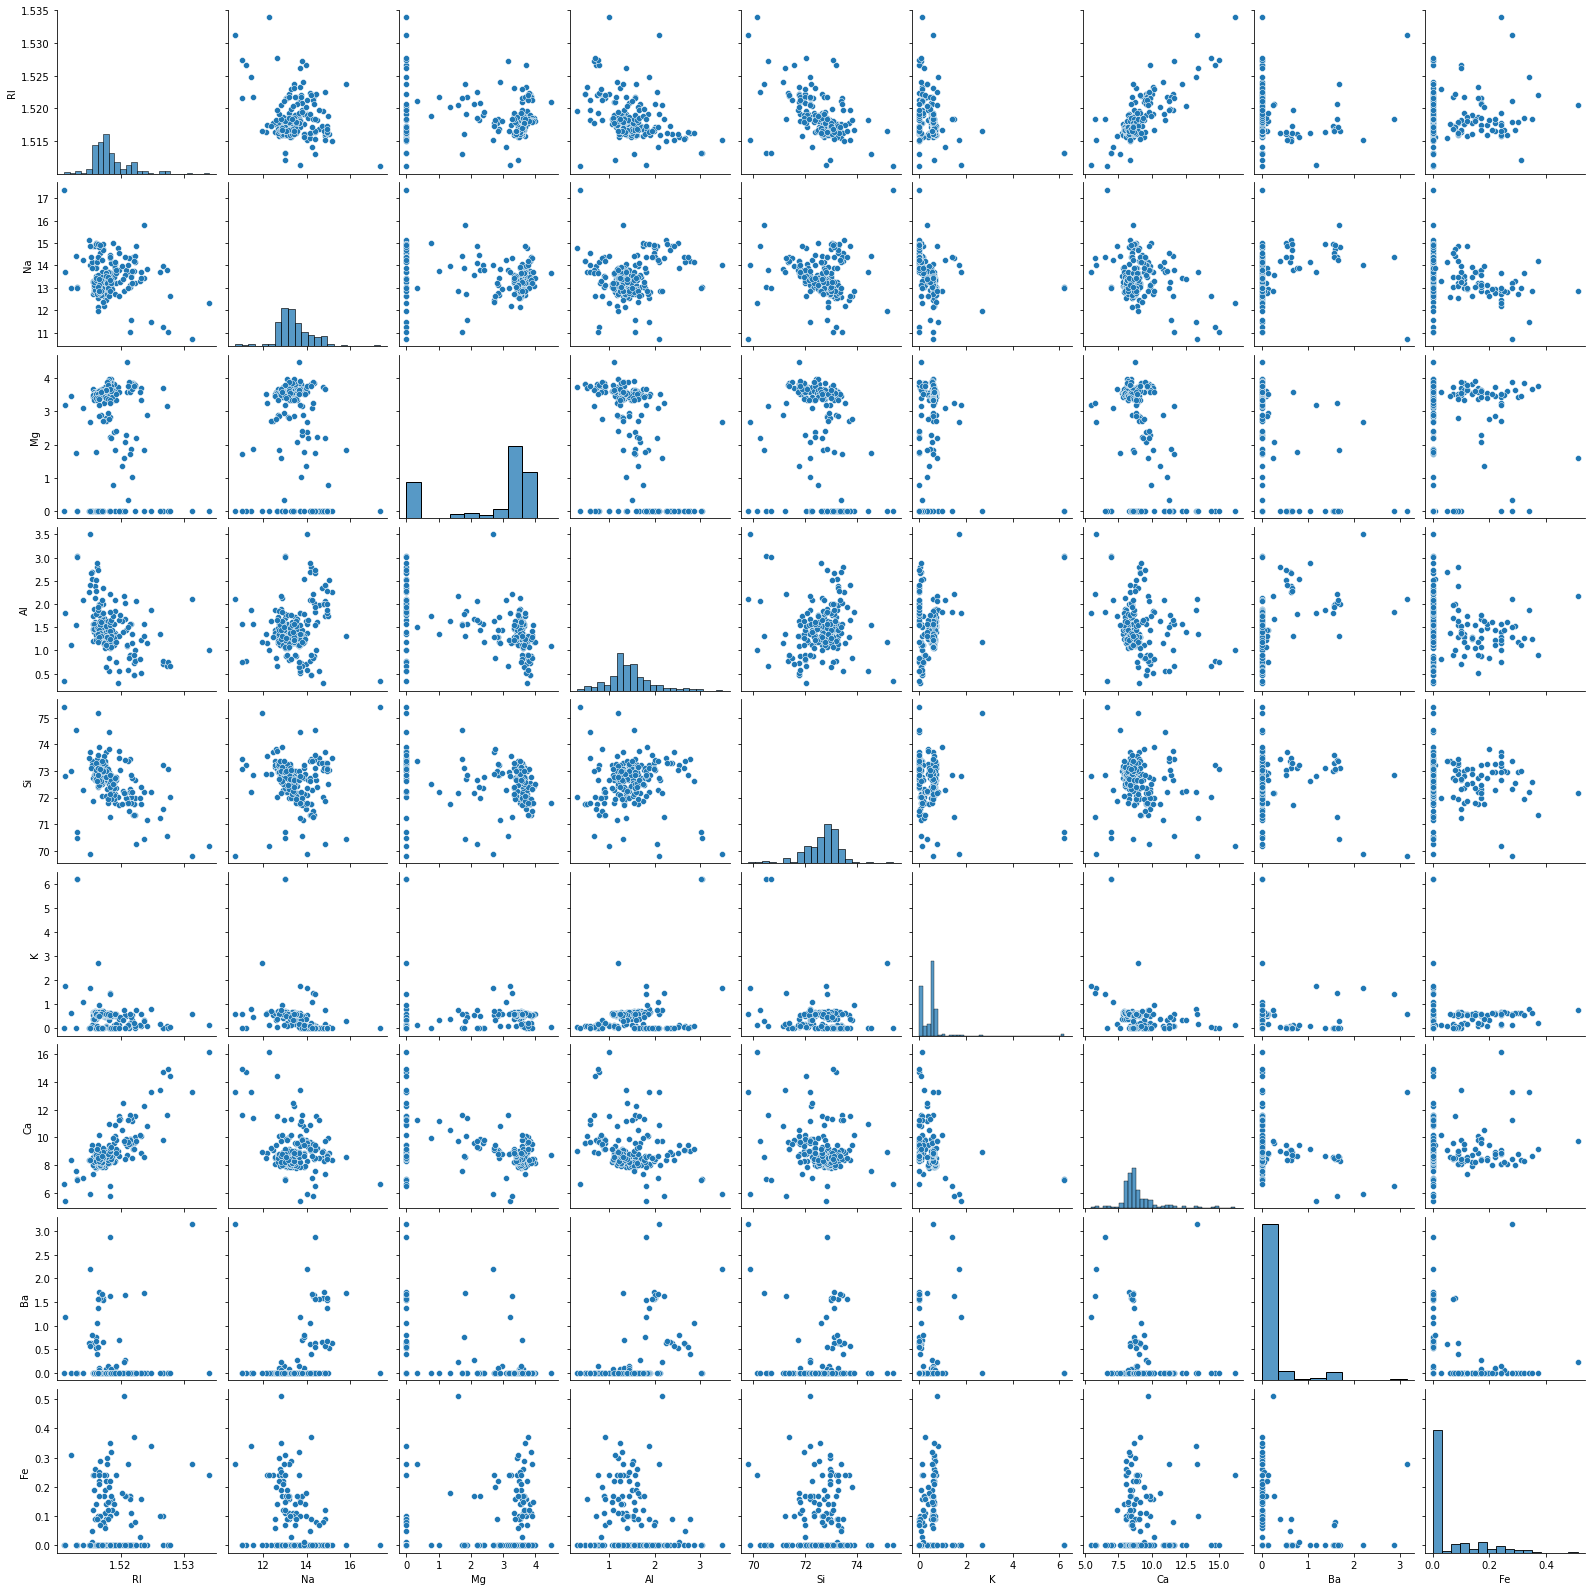

In [40]:
# Pairplot
# This plot is a little overwhelming but can sometimes be useful as an overview to identify trends
features = df.columns[:-1].tolist()
plt.figure(figsize=(7,7))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

### Train/test split and model

In [42]:
x = df.drop(["Type"],axis=1)
y = df['Type']
TEST_SIZE = 0.3

# Split up into train and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=TEST_SIZE)

# Scale data ----- fairly rudimentary scaling here, need to improve
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = RandomForestClassifier()
model = model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [51]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.77%


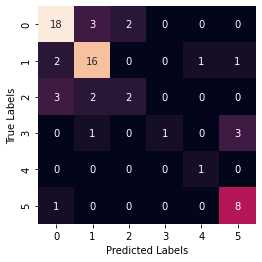

In [45]:
cm = confusion_matrix(Y_test, y_pred)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

In [46]:
kfold = StratifiedKFold(n_splits=3)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy',n_jobs=-1)

In [47]:
cv_results.mean()

0.7917006802721088

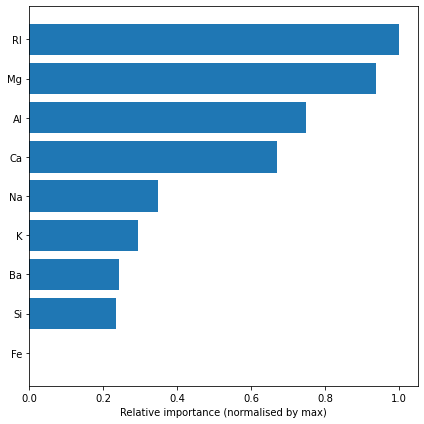

In [48]:
# Get feature importances from RF model
imp = model.feature_importances_
imp_norm = (imp - np.min(imp)) / (np.max(imp) - np.min(imp))

# Sort 
sorted_idx = np.argsort(imp)
names_sorted = x.columns[sorted_idx]
imp_sorted = imp[sorted_idx]
imp_norm_sorted = imp_norm[sorted_idx]

# Plot
fig, ax = plt.subplots(figsize=(6,6)) 
ax.barh(names_sorted, imp_norm_sorted)
ax.set_xlabel("Relative importance (normalised by max)")
plt.tight_layout()

In [ ]:
# To add
# - Different models / algorithms
# - Pipeline methodology (trying multiple models)
# - Tuning parameters (grid search)